# Đào Phước Bản - 17520263

Link google drive : https://drive.google.com/drive/folders/1bkccz_MqxJPUqesDeaM5lUAqw67dQ_Gl?usp=sharing

Link video predict:
https://drive.google.com/file/d/1XLvhFMpgN69Y_WTJncRj-X_laEycyk74/view?usp=sharing
(đã nhân đôi tốc độ phát lên 2 lần (60fps) nên video ngắn hơn 1/2 lần

Xây dựng bộ phát hiện đối tượng với thuật toán YOLOv3 được viết bằng thư viện Keras. Thư viện này bao gồm đầy đủ các module: phát hiện đối tượng với pre-trainded model, huấn luyện lại mô hình, phát hiện đối tượng ảnh trên ảnh/video/webcam.

Đầu tiên, ta sẽ khởi tạo Google Colab với sử dụng 1 GPU. Sau đó thực hiện kết nối với Google Drive của tài khoản cá nhân như sau:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
lab_path = "/content/drive/My\ Drive/AdvancedComputerVision/keras-yolo3"

Sau đó, sử dụng git để clone thư mục project từ github của tác giả experiencor với đường dẫn như sau. Lưu ý rằng, ta nên đặt thực project kế bên file jupyter notebook này để tiện thao tác.

In [ ]:
!git clone https://github.com/experiencor/keras-yolo3.git $lab_path

fatal: destination path '/content/drive/My Drive/AdvancedComputerVision/keras-yolo3' already exists and is not an empty directory.


Sau đó tiến hành cài đặt các thư viện cần thiết để có thể sử dụng được keras-yolo3. Đây là bước thực hiện quan trọng vì thông thường các thư viện sẽ sử dụng các thư viện bên thứ 3 với các phiên bản cố định. Do đó, để đảm bảo thư viện keras-yolo3 sử dụng trơn tru thì ta sẽ cài đặt các thư viện kèm theo trong file requirements.txt.

In [ ]:
!pip install -r $lab_path/requirements.txt

1. Thử nghiệm với pretrained model của tác giả thuật toán YOLO.

File mô hình huấn luyện sẵn được đặt ở đường dẫn sau https://pjreddie.com/media/files/yolov3.weights
Lưu ý là file mô hình cần được đặt trong thư mục gốc của thư viện để tiện cho việc thực hiện.

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights -O $lab_path/yolov3.weights

--2020-07-15 16:37:51--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘/content/drive/My Drive/AdvancedComputerVision/keras-yolo3/yolov3.weights’

/content/drive/My D 100%[===================>] 236.52M   209KB/s    in 19m 26s 

2020-07-15 16:57:18 (208 KB/s) - ‘/content/drive/My Drive/AdvancedComputerVision/keras-yolo3/yolov3.weights’ saved [248007048/248007048]



Sau đó, ta tiến hành sử dụng pretrained model để phát hiện đối tượng trong ảnh cho trước. Sử dụng chương trình yolo3_one_file_to_detect_them_all.py với file mô hình đã download ở file trước đó để phát hiện các đối tượng trong ảnh. Tập dữ liệu các đối tượng phát hiện được lấy từ tập PASCAL VOC 2012.

Ảnh kết quả phát hiện đối tượng trên pretrained model cho tập dữ liệu này được minh hoạ như ở hình sau:

![alt text](https://i.imgur.com/6nun5fl.jpg)

In [ ]:
!python $lab_path/yolo3_one_file_to_detect_them_all.py -w $lab_path/yolov3.weights -i $lab_path/test.jpg

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2020-07-17 05:03:52.260864: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-17 05:03:52.288846: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-17 05:03:52.289427: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla P4 major: 6 minor: 1 memoryClockRate(GHz): 1.1135
pciBusID: 0000:00:04.0
2020-07-17 05:03:52.290015: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2020-07-17 05:03:52.293719: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2020-07-17 05:03:52.295677: I tensorf

Hiển thị kết quả

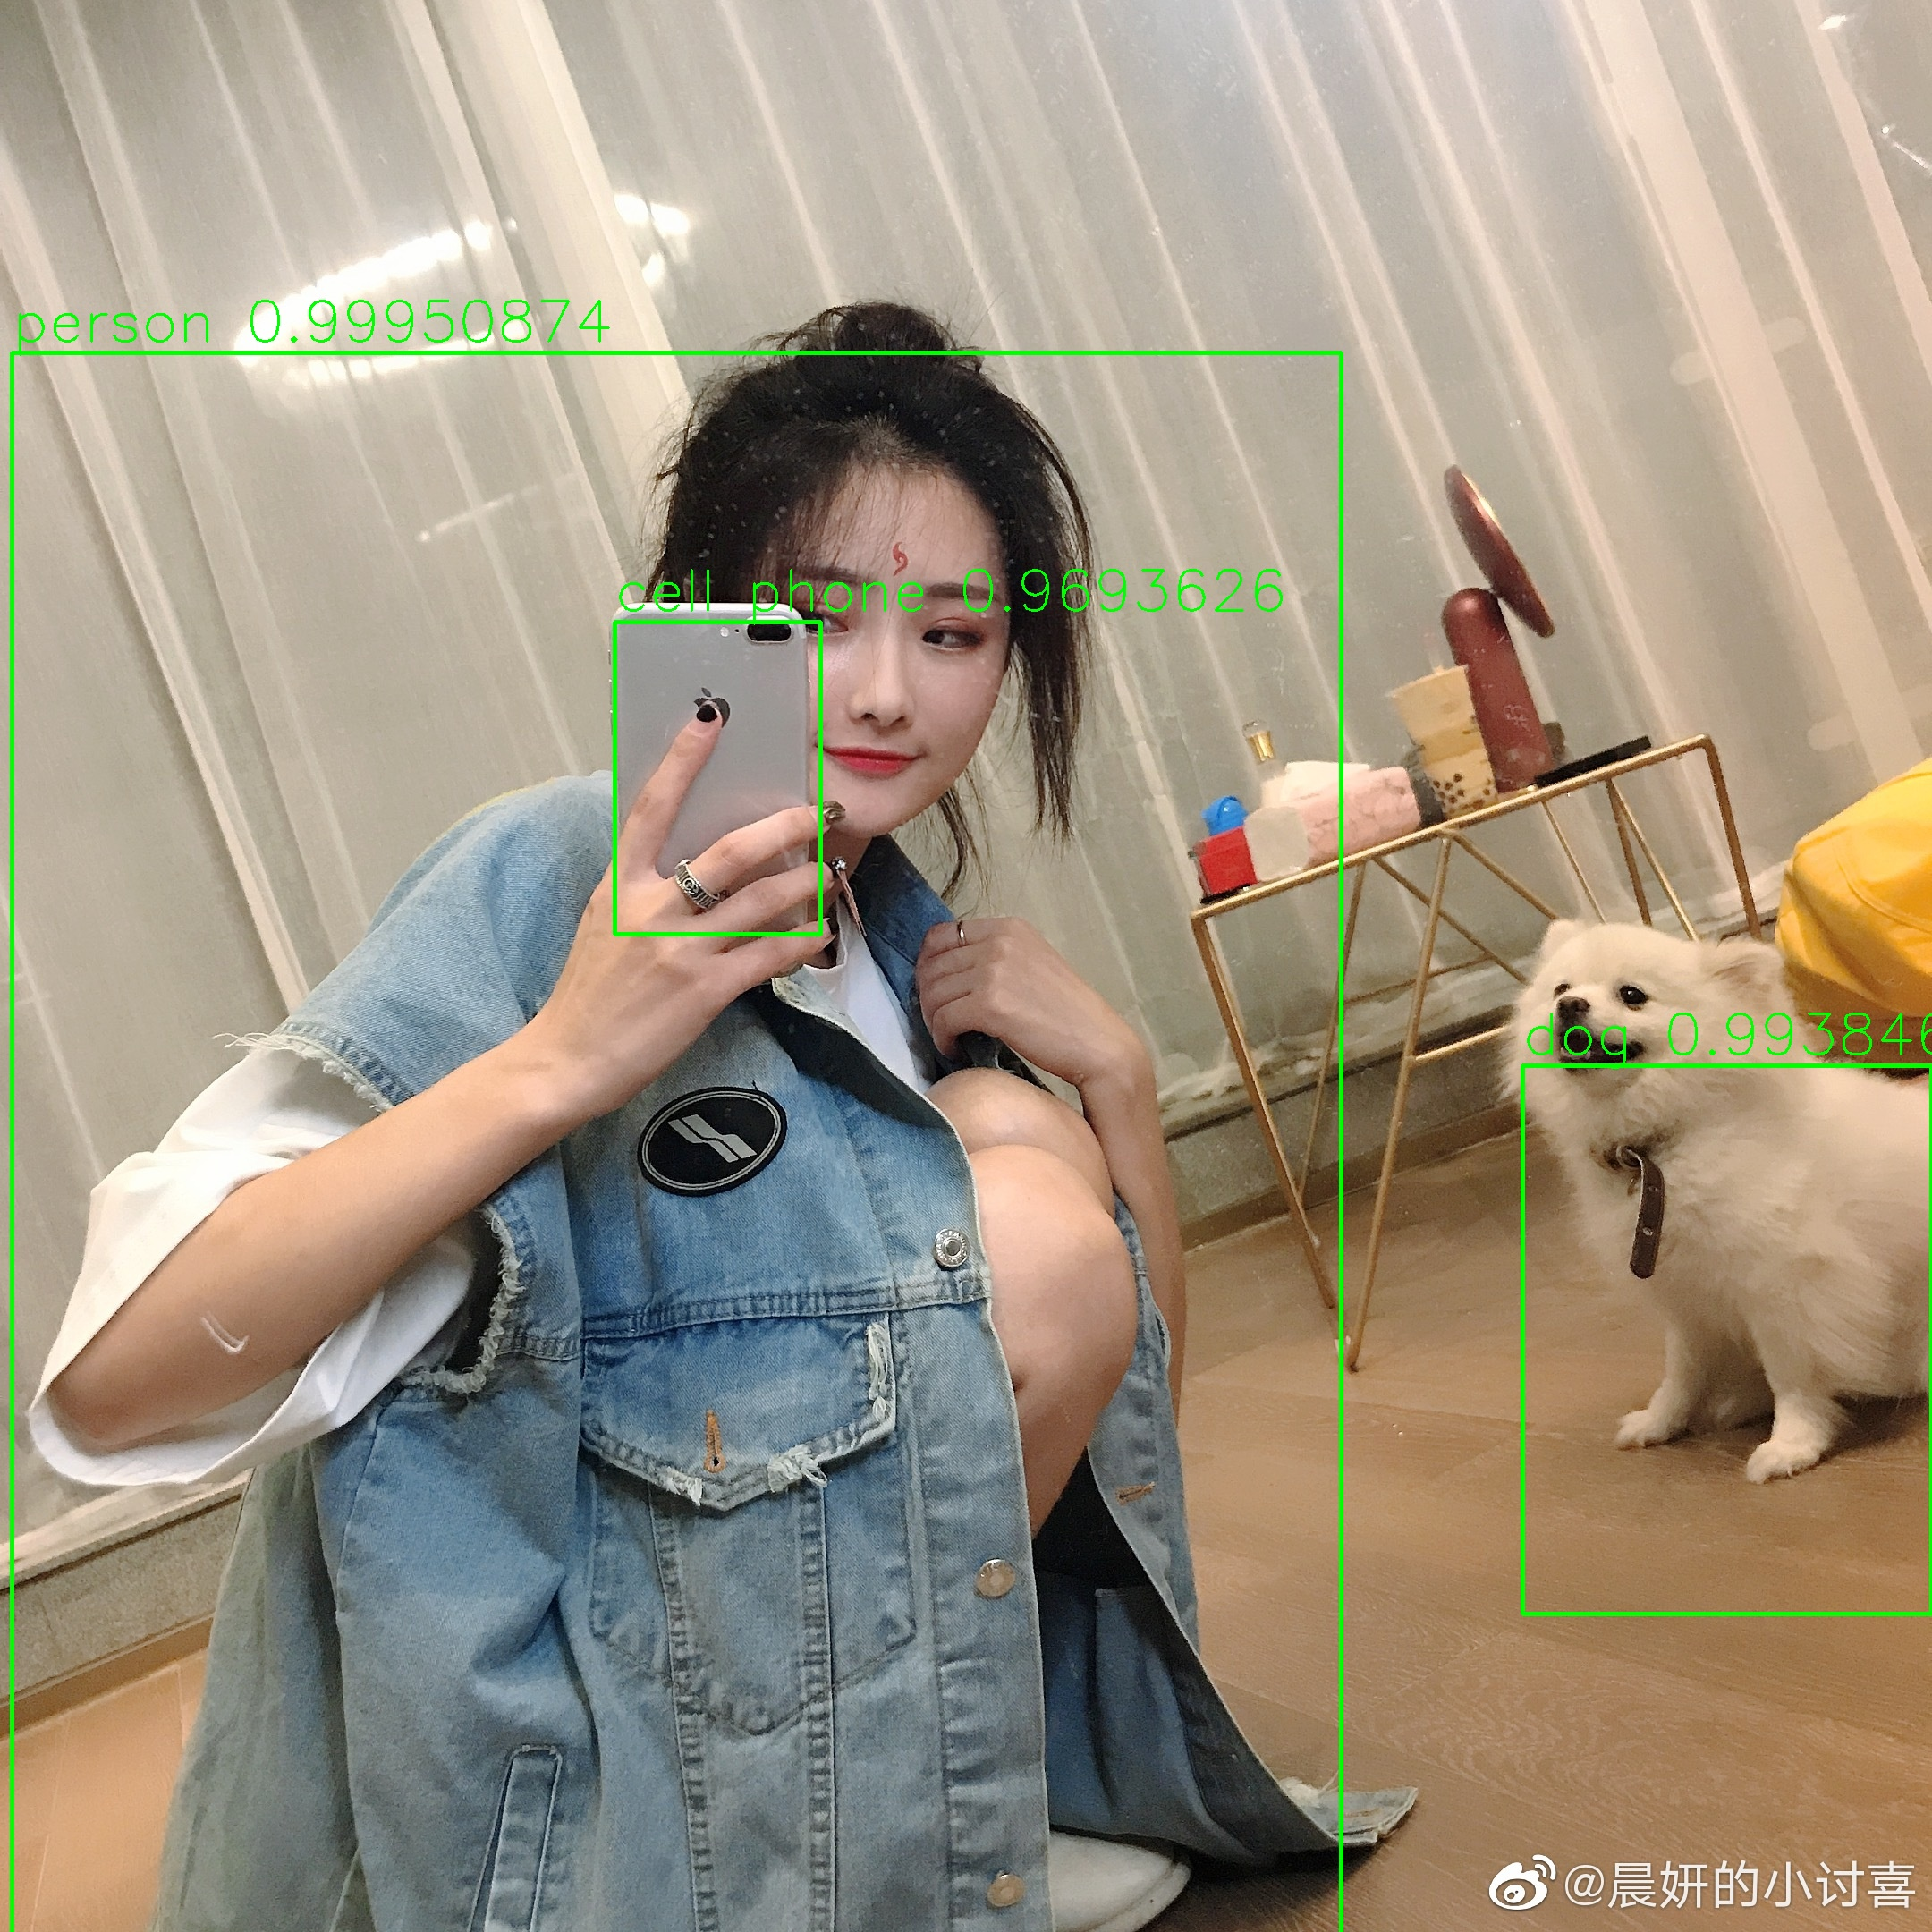

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/drive/My Drive/AdvancedComputerVision/keras-yolo3/test_detected.jpg')
cv2_imshow(img)

2. Huấn luyện dữ liệu với keras-yolo3

![alt text](https://i.imgur.com/45SRniL.jpg)

Bước tiếp theo, ta sẽ tiến hành huấn luyện trên tập dữ liệu mới là gấu mèo (raccoon). Tập dữ liệu này được tải từ https://github.com/experiencor/raccoon_dataset.git

Lưu ý rằng, ta sẽ chỉ sử dụng 2 thư mục của github này là images và annotations. Trong đó,

*   images: thư mục chứa các ảnh về gấu mèo
*   annotations: tương ứng với từng file ảnh của thư mục images, ta có một file .xml chứa thông tin về vị trí chính xác của đối tượng (gấu mèo) trong ảnh.

Các bạn nên xem kỹ định dạng của các file XML này để biết cấu trúc file gán nhãn phục vụ cho việc thực hiện đồ án sau này.



In [ ]:
!git clone https://github.com/experiencor/raccoon_dataset.git $lab_path/raccoon_dataset

Cloning into '/content/drive/My Drive/AdvancedComputerVision/keras-yolo3/raccoon_dataset'...
remote: Enumerating objects: 646, done.
remote: Total 646 (delta 0), reused 0 (delta 0), pack-reused 646
Receiving objects: 100% (646/646), 48.00 MiB | 16.93 MiB/s, done.
Resolving deltas: 100% (412/412), done.
Checking out files: 100% (419/419), done.


Một file khác cũng rất quan trọng của các mô hình huấn luyện học sâu nói chung và YOLO nói riêng là file cấu hình (config) các tham số khi huấn luyện.

Trong thư viện này, file config được đặt trong thư mục /zoo. Ví dụ như config_raccoon.json. Các tham số cơ bản của file config như:
- Đường dẫn đến thư mục train, validation (mặc định chia tỉ lệ train:validation = 8:2 nếu không có tham số gắn sẵn)
- GPU sử dụng để huấn luyện
- File pretrained cho tập image net backend.h5
- Learning rate
- Batch size

Sau khi đã cấu hình file config, ta sẽ tiến hành huấn luyện:

Để chương trình train có thể chạy được ta phải tải thêm file backend.h5 chứa pretrained model của backbone model và đặt ở thư mục lab_path:
https://drive.google.com/file/d/1f3Ylajkfg69iXc5159oJlYsq-9D_Px50/view?usp=sharing

In [ ]:
!python $lab_path/train.py -c $lab_path/zoo/config_raccoon.json

Using TensorFlow backend.
2020-07-17 06:16:32.774031: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2020-07-17 06:16:32.778802: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000129999 Hz
2020-07-17 06:16:32.778993: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x18b8bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-07-17 06:16:32.779022: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-07-17 06:16:32.780963: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-17 06:16:32.898855: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

Sau khi quá trình huấn luyện kết thúc, hệ thống sẽ lưu mô hình raccoon.h5 trong thư mục của máy ảo colab. Ta có thể sửa lại mã nguồn của thư viện để các file mô hình và file trung gian đặt trong thư mục của thư viện cho gọn gàng.

Sau đó, ta sẽ tiến hành thử nghiệm mô hình đã huấn luyện trên ảnh mẫu lấy từ mạng internet hoặc thư mục ảnh validation/train.

In [ ]:
!python $lab_path/predict.py -c $lab_path/zoo/config_raccoon.json -i $lab_path/raccoon_dataset/images/raccoon-1.jpg -o $lab_path/output/

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2020-07-17 06:53:33.159951: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-17 06:53:33.187149: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-17 06:53:33.187765: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla P4 major: 6 minor: 1 memoryClockRate(GHz): 1.1135
pciBusID: 0000:00:04.0
2020-07-17 06:53:33.188147: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2020-07-17 06:53:33.191280: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2020-07-17 06:53:33.193261: I tensorf

Hiển thị kết quả

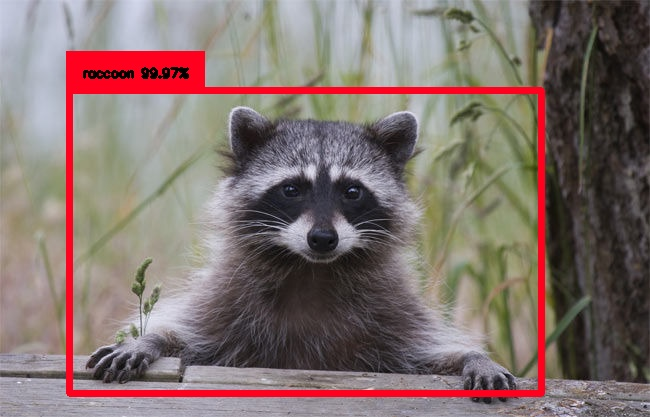

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/drive/My Drive/AdvancedComputerVision/keras-yolo3/output/raccoon-1.jpg')
cv2_imshow(img)

# Dữ liệu giao thông

Như vậy, trong phần bài tập này chúng ta đã làm quen với thư viện keras-yolo3. Trong phần đồ án giữa kỳ, ta sẽ tiến hành trên dữ liệu video giao thông được thu tại TP. Hồ Chí Minh. Ví dụ, ảnh sau được cắt tại góc đường Nam Kỳ Khởi Nghĩa - Võ Thị Sáu.

![alt text](https://i.imgur.com/NQBeNpG.jpg)

Mục tiêu của đồ án này là sử dụng thuật toán YOLOv3 để tiến hành ước lượng lưu lượng giao thông theo các hướng đi.

Đầu tiên, ta sẽ thử sử dụng pretrained model lên dữ liệu video thực tế.

Sau đó tiến hành xây dựng bộ dữ liệu gán nhãn cho ngữ cảnh camera giao thông.

Huấn luyện lại mô hình với dữ liệu gán nhãn mới.

Phát hiện và đếm các đối tượng xe máy, xe hơi trong video giao thông.

Video test: https://drive.google.com/file/d/1u__2tl79nSevF_pnvwsVd79Hu1aWLJQE/view?usp=sharing

Tập ảnh dùng để train: https://drive.google.com/file/d/1mKBQerK3F8UKuyoOugd_roCnDfvswXtn/view?usp=sharing



Generate anchor boxes:

In [ ]:
!python $lab_path/gen_anchors.py -c $lab_path/zoo/config_traffic.json

/content/drive/My Drive/AdvancedComputerVision/keras-yolo3/giaothong/images/img1.jpg
/content/drive/My Drive/AdvancedComputerVision/keras-yolo3/giaothong/images/img10.jpg
/content/drive/My Drive/AdvancedComputerVision/keras-yolo3/giaothong/images/img11.jpg
/content/drive/My Drive/AdvancedComputerVision/keras-yolo3/giaothong/images/img110.jpg
/content/drive/My Drive/AdvancedComputerVision/keras-yolo3/giaothong/images/img111.jpg
/content/drive/My Drive/AdvancedComputerVision/keras-yolo3/giaothong/images/img112.jpg
/content/drive/My Drive/AdvancedComputerVision/keras-yolo3/giaothong/images/img113.jpg
/content/drive/My Drive/AdvancedComputerVision/keras-yolo3/giaothong/images/img114.jpg
/content/drive/My Drive/AdvancedComputerVision/keras-yolo3/giaothong/images/img115.jpg
/content/drive/My Drive/AdvancedComputerVision/keras-yolo3/giaothong/images/img116.jpg
/content/drive/My Drive/AdvancedComputerVision/keras-yolo3/giaothong/images/img117.jpg
/content/drive/My Drive/AdvancedComputerVision/

Train:

In [ ]:
!python $lab_path/train.py -c $lab_path/zoo/config_traffic.json

Using TensorFlow backend.
2020-07-21 16:53:07.803091: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-07-21 16:53:07.808392: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-07-21 16:53:07.808655: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2e84bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-07-21 16:53:07.808713: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-07-21 16:53:07.810857: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-21 16:53:07.884197: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07

Predict:

In [ ]:
!python $lab_path/predict.py -c $lab_path/zoo/config_traffic.json -i $lab_path/007.mp4 -o $lab_path/output/

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2020-07-22 04:29:04.690303: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-22 04:29:04.708302: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-22 04:29:04.709149: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2020-07-22 04:29:04.709451: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2020-07-22 04:29:04.711031: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2020-07-22 04:29:04.712253: I tensor

Hiển thị kết quả với frame 1 và frame 101

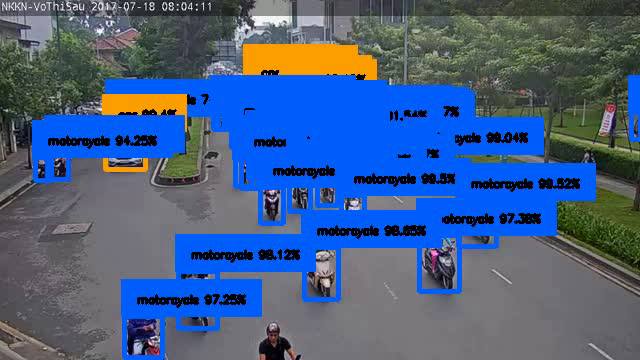

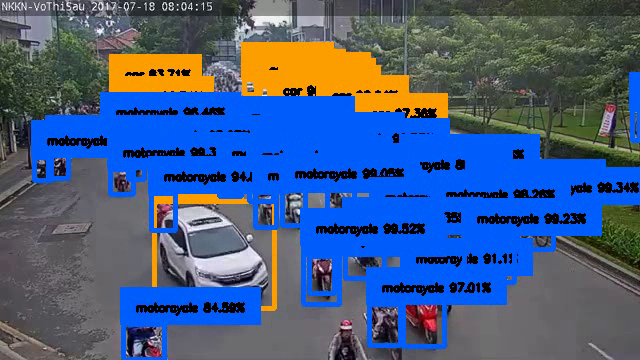

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('/content/drive/My Drive/AdvancedComputerVision/keras-yolo3/output/007.mp4')

# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
else:
  # Capture frame-by-frame 1
  ret, frame = cap.read()
  cv2_imshow(frame)

  for i in range(100):
      ret, frame = cap.read()

  # Capture frame-by-frame 101
  ret, frame = cap.read()
  cv2_imshow(frame)


Hiển thị frame 1 và 101 của video gốc 

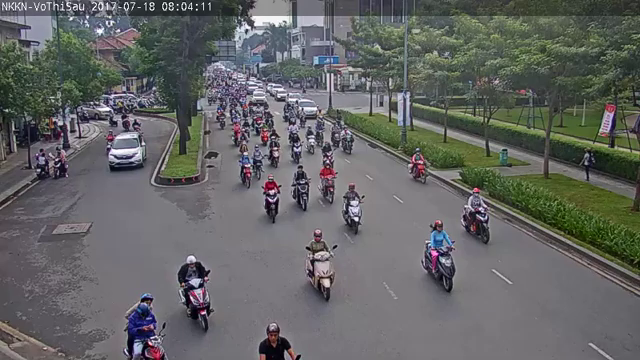

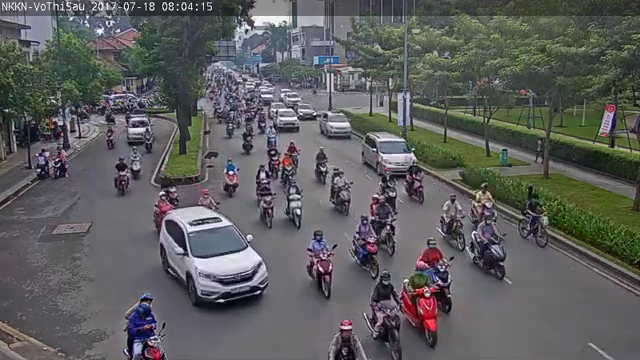

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('/content/drive/My Drive/AdvancedComputerVision/keras-yolo3/007.mp4')

# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
else:
  # Capture frame-by-frame 1
  ret, frame = cap.read()
  cv2_imshow(frame)

  for i in range(100):
    ret, frame = cap.read()

  # Capture frame-by-frame2
  ret, frame = cap.read()
  cv2_imshow(frame)

# Link video predict

https://drive.google.com/file/d/1XLvhFMpgN69Y_WTJncRj-X_laEycyk74/view?usp=sharing